In [41]:
X = []
Y = []

for line in open('train_data.txt').readlines():
    line = line.strip()
    a = line.index('[')
    b = line.index(']')
    grid = list(map(int, line[a+1: b].split(', ')))
    result = int(line[b+1:].strip())
    X.append(grid)
    Y.append(result)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_small = pca.fit_transform(X)

<AxesSubplot: >

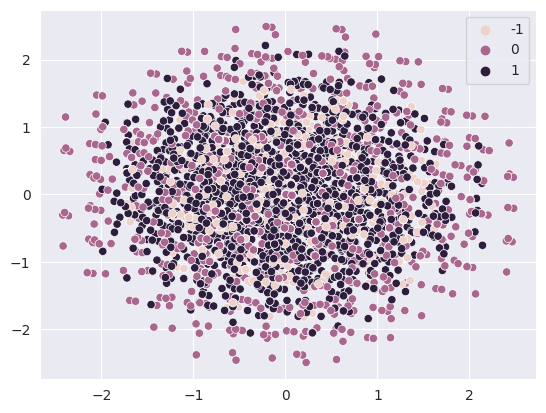

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X_small = np.array(X_small)

sns.scatterplot(x=X_small[:, 0], y=X_small[:, 1], hue=Y)

In [44]:
from sklearn.model_selection import train_test_split


train_features, test_features, train_labels, test_labels = train_test_split(
    X, Y, train_size=0.7, shuffle=False
)

In [45]:
len(train_features), len(test_features)

(5364, 2300)

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()

svc.fit(train_features, train_labels)

pred = svc.predict(test_features)

confusion_matrix(pred, test_labels)

array([[ 176,   19,    4],
       [  24, 1060,   17],
       [  33,   22,  945]])

In [47]:
svc.score(test_features, test_labels)

0.9482608695652174

In [48]:
import pickle

pickle.dump(svc, open('classical-svc-model.pkl', 'wb'))